### 取得した2光子の動画をtiff形式に変換、suite2pによるゆれ補正＋ROIの自動抽出、及びROI内の輝度変化の抽出

In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imwrite


In [4]:
# .raw　ファイルのパスを指定　（どれでも良いです）

rawpath = Path(r'Z:\aoki\rawdata\250619\MRA161-250619-2\Image_001_001.raw')
assert rawpath.exists()

In [5]:
width = 512
height = 512

# read raw data
with open(rawpath, 'rb') as f:
    raw_data = np.frombuffer(f.read(), dtype=np.uint16)

nFrames = len(raw_data) // (width * height)
print(f"number of frames: {nFrames}")

tensor = raw_data.reshape((nFrames, height, width)).astype(np.float32)


number of frames: 10000


Text(0.5, 1.0, 'red channel (calcium) mean image')

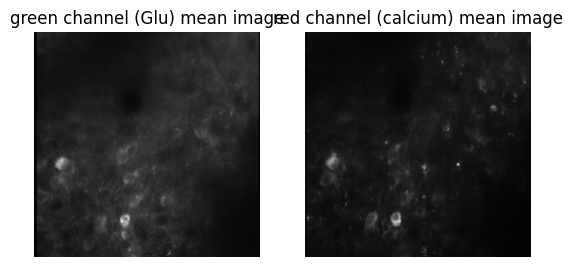

In [6]:
# 平均画像の表示　（最初の500フレーム）
plt.subplot(1, 2, 1)
plt.imshow(tensor[0:1000:2].mean(axis=0), cmap='gray')
plt.axis('off')
plt.title('green channel (Glu) mean image')

plt.subplot(1, 2, 2)
plt.imshow(tensor[1:1000:2].mean(axis=0), cmap='gray')
plt.axis('off')
plt.title('red channel (calcium) mean image')

In [ ]:
# TIFFファイルに保存
data = np.stack([tensor[::2], tensor[1::2]], axis=1)
tiffpath = rawpath.parent / 'tiff' / (rawpath.stem + '.ome.tiff')
os.makedirs(tiffpath.parent, exist_ok=True)

imwrite(
    tiffpath, 
    data,
    bigtiff = True,
    metadata={'axes': 'TCYX'},
)

### →→→作成したTIFFファイルをsuite2pで解析→→→

In [21]:
opspath = tiffpath.parent / 'suite2p' / 'plane0' / 'ops.npy'
assert opspath.exists(), f"File not found: {opspath}"

In [22]:
ops = np.load(opspath, allow_pickle=True).item()

Text(0.5, 1.0, 'red channel (calcium)')

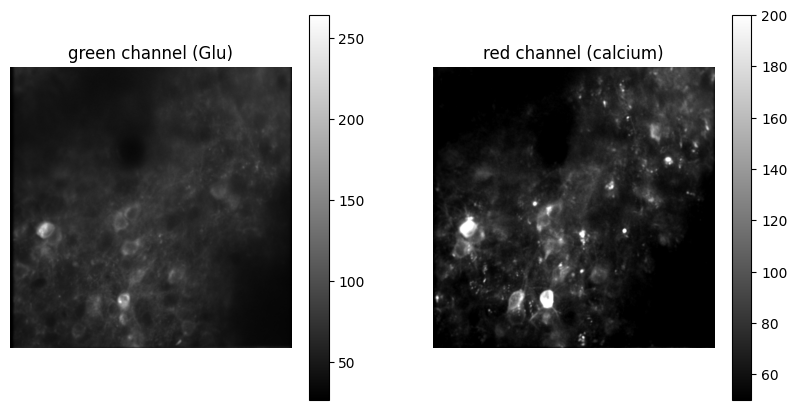

In [34]:
# ゆれ補正後の平均画像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ops['meanImg_chan2'], cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('green channel (Glu)')

plt.subplot(1, 2, 2)
plt.imshow(ops['meanImg'], cmap='gray', clim = (50, 200))
plt.axis('off')
plt.colorbar()
plt.title('red channel (calcium)')


In [26]:
Fpath = tiffpath.parent / 'suite2p' / 'plane0' / 'F.npy'
assert Fpath.exists(), f"File not found: {Fpath}"

F = np.load(Fpath, allow_pickle=True)




Text(0.5, 1.0, 'ROI 0 fluorescence trace')

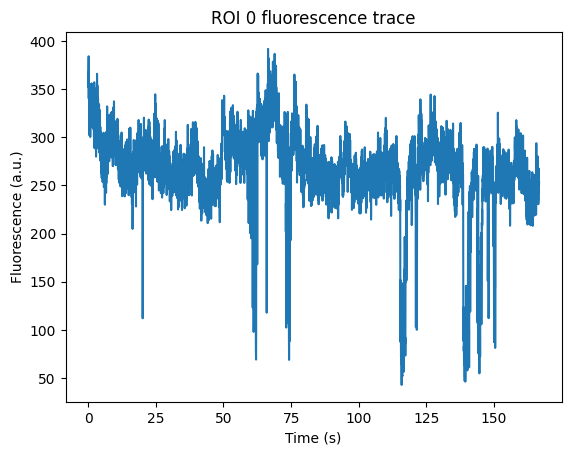

In [ ]:
# ROI内の輝度変化をプロット
iROI = 0
tbin = np.arange(F.shape[1])/30

plt.plot(tbin, F[iROI, :])

plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title(f'ROI {iROI} fluorescence trace')

